In [4]:
# Librerías
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score#,max_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

In [2]:
os.path
ruta = os.path.join("Data","")

# Datos
## SD

In [5]:
# Se cargan los datos
datosSD = pd.read_excel(ruta+"UNIANDES_SD_2021-02-01.xlsx")
# Marcar Vacíos
datosSD = datosSD.replace("--", np.nan)
datosSDconFecha = datosSD.set_index('Date & Time')
datosSD.head()

Date & Time       Date      Time  Temp - °C  Temp. Alta - °C  \
0 2019-05-07 16:00:00 2019-05-07  16:00:00       21.2             21.3   
1 2019-05-07 17:00:00 2019-05-07  17:00:00       19.4             23.0   
2 2019-05-07 18:00:00 2019-05-07  18:00:00       17.4             19.5   
3 2019-05-07 19:00:00 2019-05-07  19:00:00       16.4             17.4   
4 2019-05-07 20:00:00 2019-05-07  20:00:00       16.3             16.6   

   Temp. Baja - °C  Hum - %  Punto de rocío - °C  Wet Bulb - °C  \
0             21.2     47.0                  9.5           12.2   
1             19.4     52.0                  9.3           11.8   
2             17.4     60.0                  9.6           11.7   
3             16.3     64.0                  9.6           11.5   
4             16.1     67.0                 10.2           11.9   

   Velocidad del viento - m/s  ... Tasa de lluvia - mm/h  Rad Solar - W/m^2  \
0                         0.9  ...                   0.0                NaN   
1                         0.4  ...                   0.0               59.0   
2                         1.3  ...                   0.0               47.0   
3                         2.2  ...                   0.0                0.0   
4                         0.9  ...                   0.0                0.0   

   Energía solar Rad Solar Alta - W/m^2  ET - mm  El índice UV - Index  \
0            NaN                    NaN     0.00                   1.6   
1           5.08                  162.0     0.05                   0.4   
2           4.04                   97.0     0.05                   0.0   
3           0.00                    0.0     0.03                   0.0   
4           0.00                    0.0     0.03                   0.0   

   Dosis de UV  Alto índice UV - Index  Días-grado de calentamiento  \
0         0.69                     1.6                        0.000   
1         0.17                     1.6                        0.000   
2         0.00                     0.5                        0.067   
3         0.00                     0.0                        0.142   
4         0.00                     0.0                        0.150   

   Días-grado de enfriamiento  
0                       0.217  
1                       0.083  
2                       0.000  
3                       0.000  
4                       0.000  

[5 rows x 30 columns]

C:\Users\Sony\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Sony\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


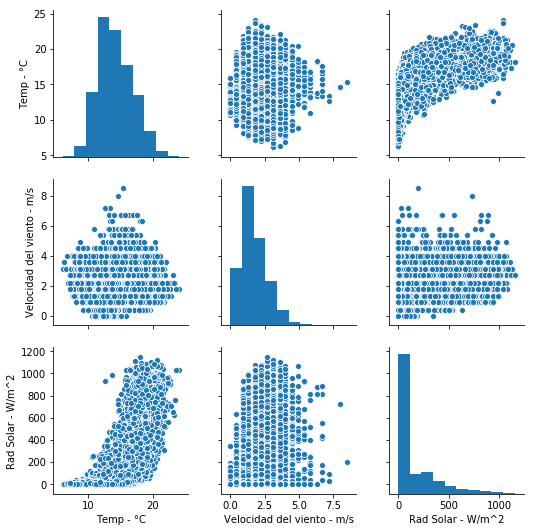

In [20]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(datosSD[["Temp - °C", "Velocidad del viento - m/s", "Rad Solar - W/m^2"]])
plt.show()

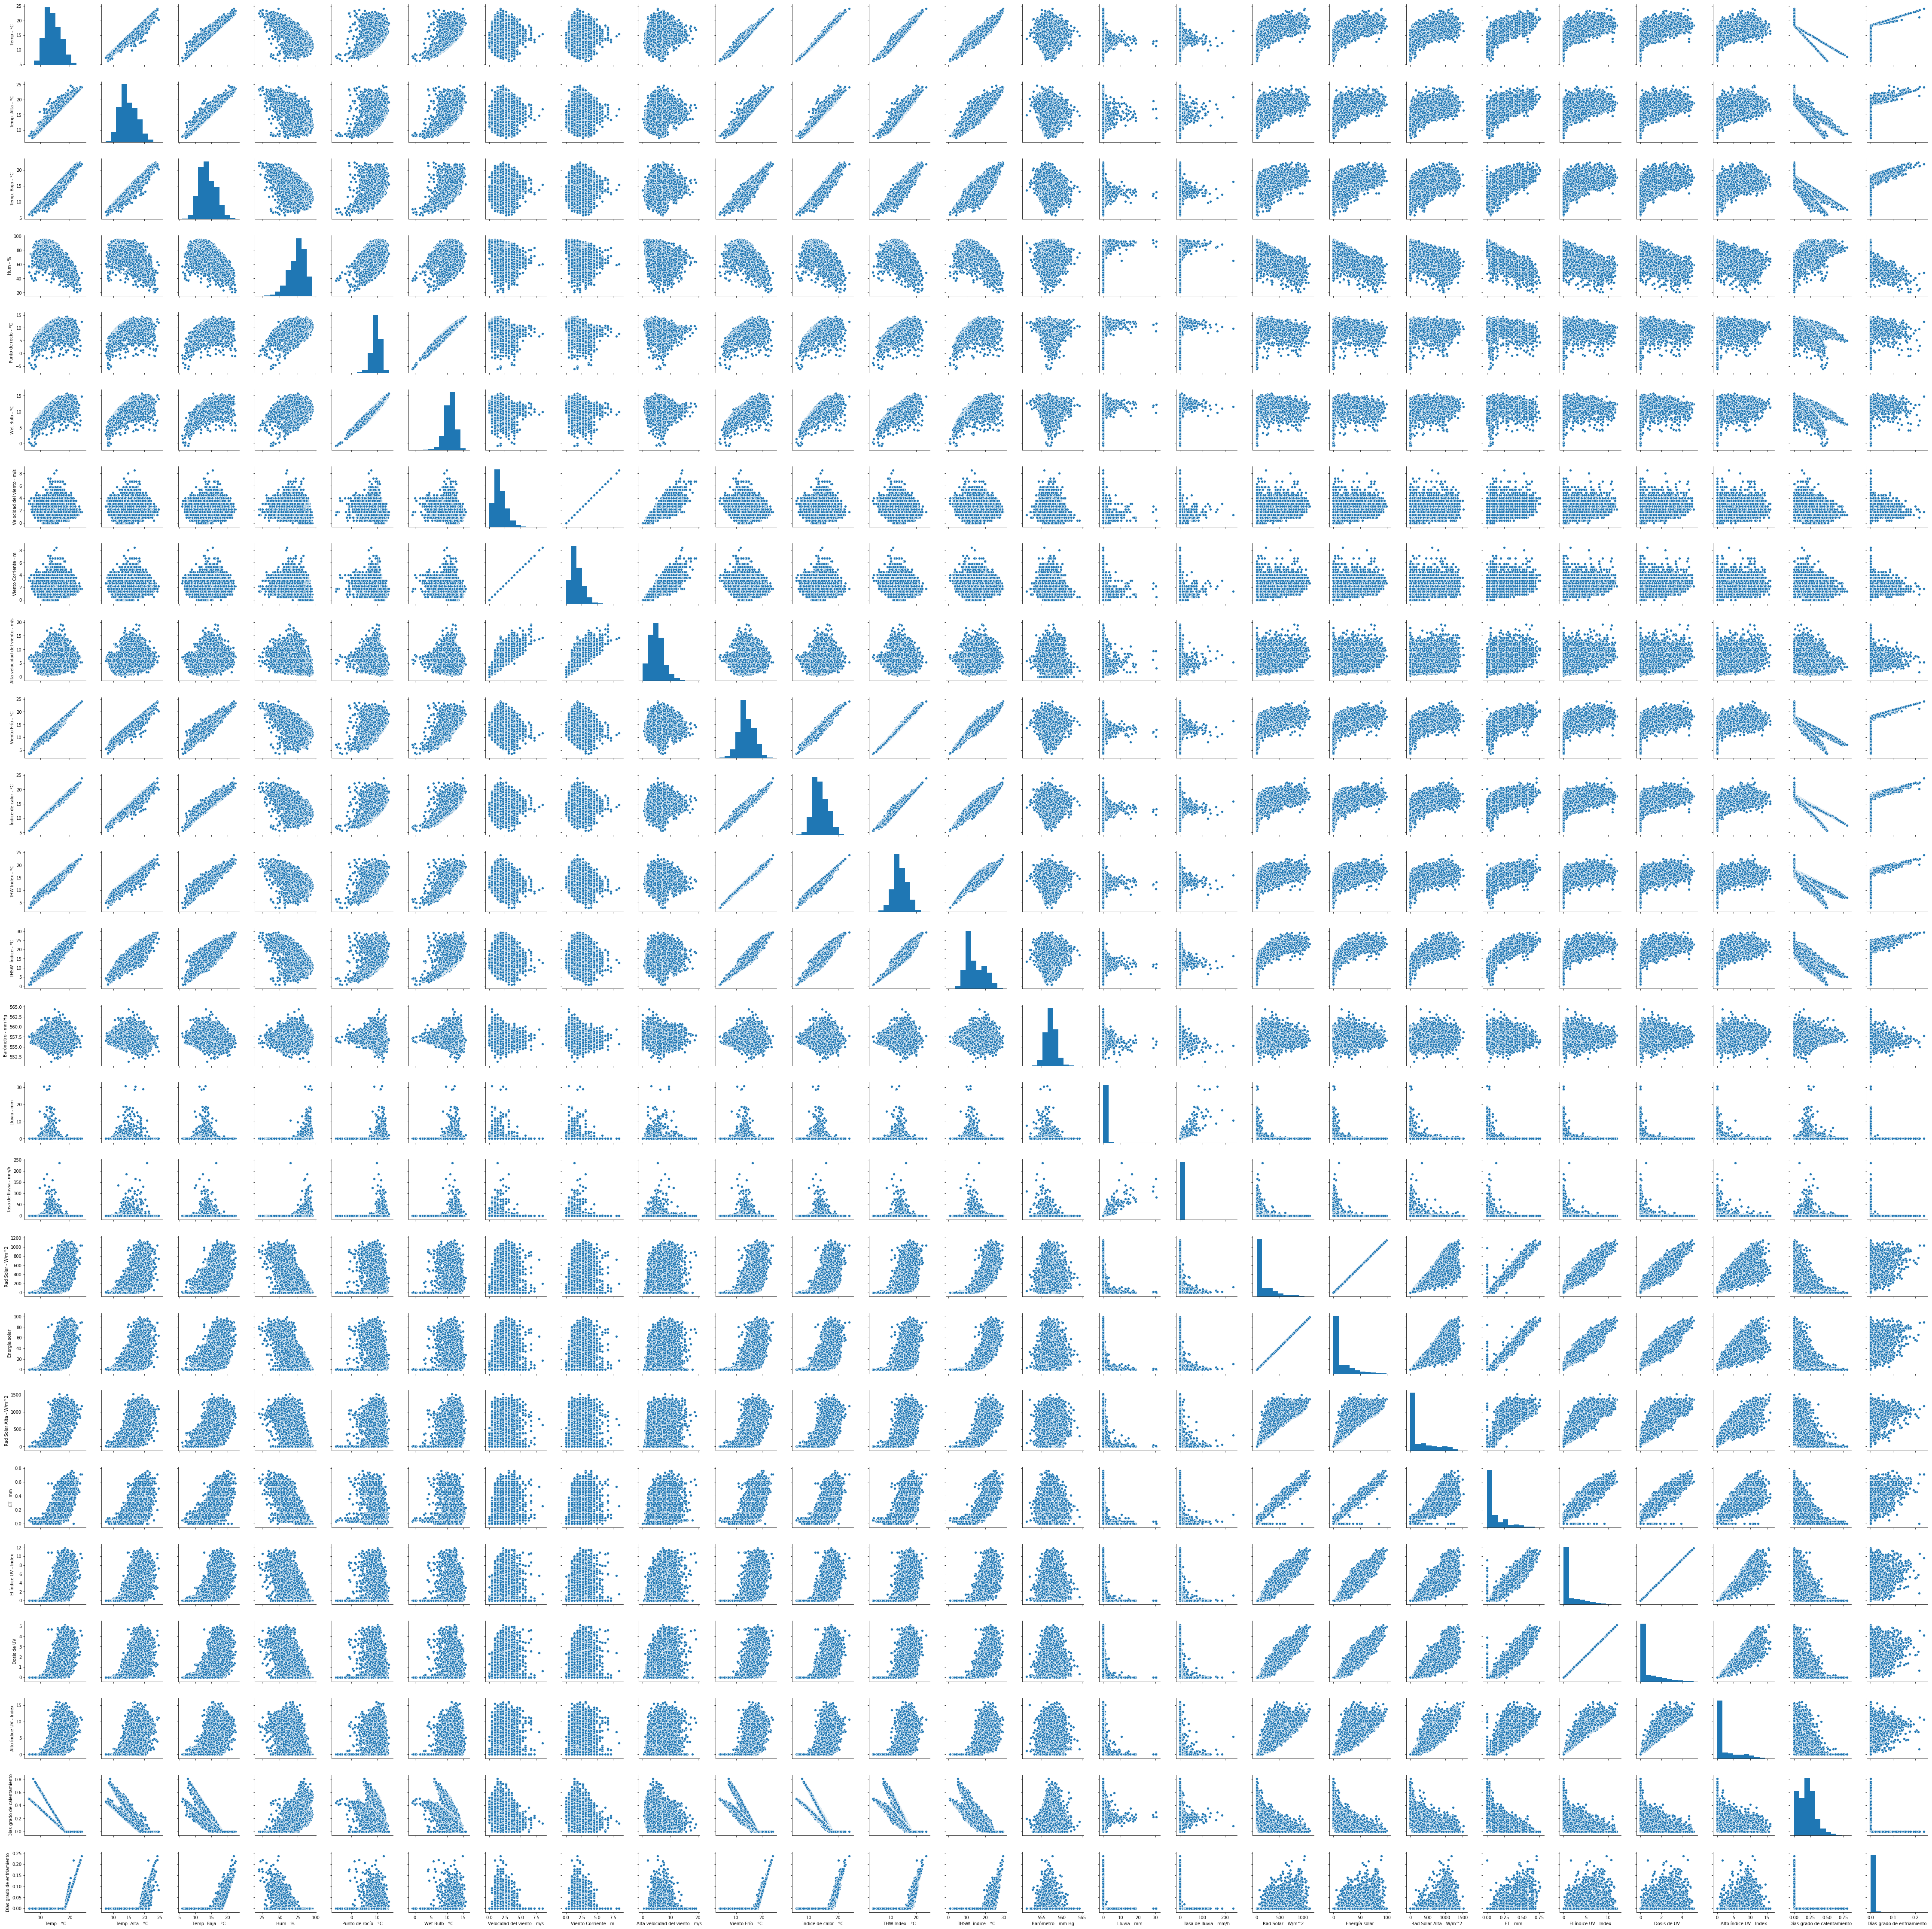

In [22]:
# Numerics
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
sns.pairplot(datosSD.select_dtypes(include=numerics))
plt.show()

In [ ]:
sns.scatterplot(data=shuffle_data, x="Temp",y="AirTemp")
plt.show()

## SD Temp

In [6]:
datosTempSD = pd.read_csv('Temp_SD_2019_01_01_2021_04_28.csv', sep=";")#,error_bad_lines=False)
datosTempSD.columns = ["Time", "Tc", "Ta"]
datosTempSD["Tc"] = datosTempSD["Tc"].str.replace(",",".").astype(float)
datosTempSD["Ta"] = datosTempSD["Ta"].str.replace(",",".").astype(float)

datosTempSD = datosTempSD[(~datosTempSD["Tc"].isna())].reset_index(drop=True)

datosTempSD.head()

Time      Tc  Ta
0  2019-10-01 00:00:00  10.274 NaN
1  2019-10-01 01:00:00  10.394 NaN
2  2019-10-01 02:00:00   9.590 NaN
3  2019-10-01 03:00:00   9.431 NaN
4  2019-10-01 04:00:00  10.331 NaN

## SOLCAST

In [7]:
datos_solar =  pd.read_csv("datosSOLCAST_Unidos.csv")
"Los datos de Solar se tiene: 2007-01-01T01:00:00Z - 2021-01-25T22:00:00Z"
# Se arregla la zona horaria de los datos
datos_solar['Date & Time'] = (pd.to_datetime(datos_solar['PeriodStart']) - \
                              pd.Timedelta(hours=5)).dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')
#datos_solar['Date & Time']

0        2006-12-31 20:00:00
1        2006-12-31 21:00:00
2        2006-12-31 22:00:00
3        2006-12-31 23:00:00
4        2007-01-01 00:00:00
5        2007-01-01 01:00:00
6        2007-01-01 02:00:00
7        2007-01-01 03:00:00
8        2007-01-01 04:00:00
9        2007-01-01 05:00:00
10       2007-01-01 06:00:00
11       2007-01-01 07:00:00
12       2007-01-01 08:00:00
13       2007-01-01 09:00:00
14       2007-01-01 10:00:00
15       2007-01-01 11:00:00
16       2007-01-01 12:00:00
17       2007-01-01 13:00:00
18       2007-01-01 14:00:00
19       2007-01-01 15:00:00
20       2007-01-01 16:00:00
21       2007-01-01 17:00:00
22       2007-01-01 18:00:00
23       2007-01-01 19:00:00
24       2007-01-01 20:00:00
25       2007-01-01 21:00:00
26       2007-01-01 22:00:00
27       2007-01-01 23:00:00
28       2007-01-02 00:00:00
29       2007-01-02 01:00:00
                 ...        
123304   2021-01-24 11:00:00
123305   2021-01-24 12:00:00
123306   2021-01-24 13:00:00
123307   2021-

In [11]:
datos_solar.describe()

AirTemp    AlbedoDaily        Azimuth   CloudOpacity  \
count  123334.000000  123334.000000  123334.000000  123334.000000   
mean       16.490122       0.125194      -0.150737      41.219229   
std         2.865403       0.005043      96.012780      27.319541   
min         5.300000       0.120000    -174.000000       0.000000   
25%        14.600000       0.120000     -89.000000      17.600000   
50%        16.500000       0.130000     -14.000000      43.700000   
75%        18.500000       0.130000      89.000000      63.400000   
max        25.500000       0.140000     170.000000     100.000000   

        DewpointTemp            Dhi            Dni            Ebh  \
count  123334.000000  123334.000000  123334.000000  123334.000000   
mean       13.910538     125.877317     112.551794      75.497251   
std         2.269917     167.664278     228.060272     168.530507   
min        -5.300000       0.000000       0.000000       0.000000   
25%        13.200000       0.000000       0.000000       0.000000   
50%        14.400000       7.000000       0.000000       0.000000   
75%        15.300000     233.000000      95.000000      45.000000   
max        19.300000     726.000000    1118.000000    1037.000000   

                 Ghi   GtiFixedTilt    GtiTracking  PrecipitableWater  \
count  123334.000000  123334.000000  123334.000000      123334.000000   
mean      201.377852     195.636361     226.108932          25.987851   
std       273.401148     263.397997     299.800713           4.089952   
min         0.000000       0.000000       0.000000           2.900000   
25%         0.000000       0.000000       0.000000          23.600000   
50%         9.000000       9.000000       8.000000          26.600000   
75%       374.000000     369.000000     441.000000          28.900000   
max      1129.000000    1092.000000    1119.000000          38.600000   

       RelativeHumidity  SurfacePressure  WindDirection10m   WindSpeed10m  \
count     123334.000000    123334.000000     123334.000000  123334.000000   
mean          86.019176       805.436811        134.665899       1.499023   
std           13.364029        24.324412         73.778456       0.629107   
min           24.000000       734.200000          0.000000       0.000000   
25%           79.300000       812.800000        101.000000       1.100000   
50%           90.300000       814.200000        124.000000       1.500000   
75%           96.700000       815.200000        140.000000       1.900000   
max          100.000000       819.500000        360.000000       8.400000   

              Zenith  
count  123334.000000  
mean       89.963911  
std        47.166742  
min         6.000000  
25%        48.250000  
50%        89.000000  
75%       133.000000  
max       175.000000

## ENEL

In [9]:
"Metereológicos"
# Se hizo un script aparte para cargar todos los datos del Enel en un solo archivo
datos_Enel = pd.read_csv("datos_procesados.csv", encoding="latin-1")
#datos_Enel = datos_Enel.set_index("Date & Time")
datos_Enel.describe()

Temp - °C  Temp. Alta - °C  Temp. Baja - °C       Hum - %  \
count  15258.000000     15057.000000     15057.000000  15003.000000   
mean      14.211737        14.759713        13.677565     74.264214   
std        2.631758         2.709943         2.524418     11.127351   
min        6.100000         7.400000         5.900000     21.000000   
25%       12.300000        12.800000        11.800000     67.000000   
50%       13.800000        14.300000        13.300000     76.000000   
75%       16.100000        16.800000        15.500000     83.000000   
max       24.100000        24.600000        22.400000     95.000000   

       Punto de rocío - °C  Wet Bulb - °C  Velocidad del viento - m/s  \
count         15003.000000   15003.000000                15258.000000   
mean              9.486469      10.870759                    1.589490   
std               1.801792       1.621114                    0.999596   
min              -6.100000      -0.700000                    0.000000   
25%               8.600000      10.000000                    0.900000   
50%               9.600000      11.000000                    1.300000   
75%              10.600000      11.900000                    2.200000   
max              14.500000      15.700000                    8.500000   

       Viento Corriente - m  Alta velocidad del viento - m/s  \
count          15057.000000                     15253.000000   
mean               1.604237                         5.095575   
std                0.994587                         2.534429   
min                0.000000                         0.000000   
25%                0.890000                         3.100000   
50%                1.340000                         4.900000   
75%                2.240000                         6.700000   
max                8.490000                        19.200000   

       Viento Frío - °C  ...  Tasa de lluvia - mm/h  Rad Solar - W/m^2  \
count      15003.000000  ...           15253.000000       15050.000000   
mean          13.987776  ...               0.667987         143.366711   
std            2.830766  ...               6.225197         221.162289   
min            3.600000  ...               0.000000           0.000000   
25%           12.100000  ...               0.000000           0.000000   
50%           13.700000  ...               0.000000           2.000000   
75%           15.900000  ...               0.000000         241.000000   
max           24.100000  ...             235.200000        1151.000000   

       Energía solar  Rad Solar Alta - W/m^2       ET - mm  \
count   15050.000000            15028.000000  15253.000000   
mean       12.335872              256.668153      0.110925   
std        19.029579              369.557770      0.141728   
min         0.000000                0.000000      0.000000   
25%         0.000000                0.000000      0.030000   
50%         0.170000               16.000000      0.030000   
75%        20.740000              432.000000      0.180000   
max        99.040000             1517.000000      0.760000   

       El índice UV - Index   Dosis de UV  Alto índice UV - Index  \
count          15053.000000  15053.000000            15023.000000   
mean               1.322075      0.566587                2.208380   
std                2.254743      0.966318                3.540358   
min                0.000000      0.000000                0.000000   
25%                0.000000      0.000000                0.000000   
50%                0.000000      0.000000                0.000000   
75%                2.000000      0.860000                3.500000   
max               11.900000      5.100000               16.000000   

       Días-grado de calentamiento  Días-grado de enfriamiento  
count                 15003.000000                15003.000000  
mean                      0.196560                    0.003631  
std                       0.127587                    0.016996  
min                       0

In [8]:
"Temp Celdas T_c"
datos_Temp_Enel = pd.read_csv("datosEnelPromediados.csv")
datos_Temp_Enel.head()

Time2  EP1_I02_AN00037  EP1_I03_AN00037  EP1_I06_AN00037  \
0  2020-08-10 00:00:00        26.402557              NaN        26.024022   
1  2020-08-10 01:00:00        26.221804              NaN        25.776248   
2  2020-08-10 02:00:00        25.880495              NaN        25.440227   
3  2020-08-10 03:00:00        24.867285              NaN        24.582534   
4  2020-08-10 04:00:00        24.188298              NaN        23.937092   

   EP1_I09_AN00037  EP1_I10_AN00037  EP1_I12_AN00037                 Time  
0        25.364945        25.654569        25.663890  2020-08-10 00:00:00  
1        25.156976        25.560735        25.347426  2020-08-10 01:00:00  
2        24.680711        25.172427        24.860468  2020-08-10 02:00:00  
3        23.988564        24.203915        23.852758  2020-08-10 03:00:00  
4        23.412628        23.653960        23.449658  2020-08-10 04:00:00

In [10]:
# Se hace una columna de fecha para ambos y así poder unirlos
datos_Enel['Fecha'] = datos_Enel['Date & Time'].astype(str)
datosSD['Fecha'] = datosSD['Date & Time'].astype(str)
datos_Enel_SD = datos_Enel.merge(datosSD, how = 'left', on = 'Fecha')
datos_Enel_SD

Date & Time_x               Date_x    Time_x  Temp - °C_x  \
0      2019-05-07 16:00:00  2019-05-07 00:00:00  16:00:00         21.2   
1      2019-05-07 17:00:00  2019-05-07 00:00:00  17:00:00         19.4   
2      2019-05-07 18:00:00  2019-05-07 00:00:00  18:00:00         17.4   
3      2019-05-07 19:00:00  2019-05-07 00:00:00  19:00:00         16.4   
4      2019-05-07 20:00:00  2019-05-07 00:00:00  20:00:00         16.3   
5      2019-05-07 21:00:00  2019-05-07 00:00:00  21:00:00         16.2   
6      2019-05-07 22:00:00  2019-05-07 00:00:00  22:00:00         16.1   
7      2019-05-07 23:00:00  2019-05-07 00:00:00  23:00:00         14.9   
8      2019-05-08 00:00:00  2019-05-08 00:00:00  00:00:00         14.8   
9      2019-05-08 01:00:00  2019-05-08 00:00:00  01:00:00         14.9   
10     2019-05-08 02:00:00  2019-05-08 00:00:00  02:00:00         13.9   
11     2019-05-08 03:00:00  2019-05-08 00:00:00  03:00:00         13.5   
12     2019-05-08 04:00:00  2019-05-08 00:00:00  04:00:00         12.8   
13     2019-05-08 05:00:00  2019-05-08 00:00:00  05:00:00         12.7   
14     2019-05-08 06:00:00  2019-05-08 00:00:00  06:00:00         12.9   
15     2019-05-08 07:00:00  2019-05-08 00:00:00  07:00:00         14.1   
16     2019-05-08 08:00:00  2019-05-08 00:00:00  08:00:00         14.1   
17     2019-05-08 09:00:00  2019-05-08 00:00:00  09:00:00         15.4   
18     2019-05-08 10:00:00  2019-05-08 00:00:00  10:00:00         15.7   
19     2019-05-08 11:00:00  2019-05-08 00:00:00  11:00:00         15.9   
20     2019-05-08 12:00:00  2019-05-08 00:00:00  12:00:00         17.7   
21     2019-05-08 13:00:00  2019-05-08 00:00:00  13:00:00         17.8   
22     2019-05-08 14:00:00  2019-05-08 00:00:00  14:00:00         17.9   
23     2019-05-08 15:00:00  2019-05-08 00:00:00  15:00:00         17.8   
24     2019-05-08 16:00:00  2019-05-08 00:00:00  16:00:00         17.6   
25     2019-05-08 17:00:00  2019-05-08 00:00:00  17:00:00         17.8   
26     2019-05-08 18:00:00  2019-05-08 00:00:00  18:00:00         16.1   
27     2019-05-08 19:00:00  2019-05-08 00:00:00  19:00:00         15.7   
28     2019-05-08 20:00:00  2019-05-08 00:00:00  20:00:00         14.9   
29     2019-05-08 21:00:00  2019-05-08 00:00:00  21:00:00         13.2   
...                    ...                  ...       ...          ...   
15228  2021-01-31 04:00:00  2021-01-31 00:00:00  04:00:00         10.4   
15229  2021-01-31 05:00:00  2021-01-31 00:00:00  05:00:00         10.1   
15230  2021-01-31 06:00:00  2021-01-31 00:00:00  06:00:00          9.7   
15231  2021-01-31 07:00:00  2021-01-31 00:00:00  07:00:00         10.4   
15232  2021-01-31 08:00:00  2021-01-31 00:00:00  08:00:00         13.1   
15233  2021-01-31 09:00:00  2021-01-31 00:00:00  09:00:00         14.2   
15234  2021-01-31 10:00:00  2021-01-31 00:00:00  10:00:00         16.1   
15235  2021-01-31 11:00:00  2021-01-31 00:00:00  11:00:00         17.1   
15236  2021-01-31 12:00:00  2021-01-31 00:00:00  12:00:00         17.8   
15237  2021-01-31 13:00:00  2021-01-31 00:00:00  13:00:00         17.7   
15238  2021-01-31 14:00:00  2021-01-31 00:00:00  14:00:00         17.5   
15239  2021-01-31 15:00:00  2021-01-31 00:00:00  15:00:00         16.2   
15240  2021-01-31 16:00:00  2021-01-31 00:00:00  16:00:00         15.0   
15241  2021-01-31 17:00:00  2021-01-31 00:00:00  17:00:00         14.9   
15242  2021-01-31 18:00:00  2021-01-31 00:00:00  18:00:00         14.4   
15243  2021-01-31 19:00:00  2021-01-31 00:00:00  19:00:00         14.1   
15244  2021-01-31 20:00:00  2021-01-31 00:00:00  20:00:00         13.7   
15245  2021-01-31 21:00:00  2021-01-31 00:00:00  21:00:00         12.4   
15246  2021-01-31 22:00:00  2021-01-31 00:00:00  22:00:00         11.3   
15247  2021-01-31 23:00:00  2021-01-31 00:00:00  23:00:00         11.2   
15248  2021-02-01 00:00:00  2021-02-01 00:00:00  00:00:00         11.2   
15249  2021-02-01 01:00:00  2021-02-01 00:00:00  01:00:00         11.6   
15250  2021-02-01

In [12]:
# Se unen los datos del SD con los de SOLCAST con la columna 'Date & Time' creada previamente
datosSD_Solcast = datosSD.merge(datos_solar, how ="left", on ='Date & Time')
datosSD_Solcast

Date & Time       Date      Time  Temp - °C  Temp. Alta - °C  \
0     2019-05-07 16:00:00 2019-05-07  16:00:00       21.2             21.3   
1     2019-05-07 17:00:00 2019-05-07  17:00:00       19.4             23.0   
2     2019-05-07 18:00:00 2019-05-07  18:00:00       17.4             19.5   
3     2019-05-07 19:00:00 2019-05-07  19:00:00       16.4             17.4   
4     2019-05-07 20:00:00 2019-05-07  20:00:00       16.3             16.6   
5     2019-05-07 21:00:00 2019-05-07  21:00:00       16.2             16.7   
6     2019-05-07 22:00:00 2019-05-07  22:00:00       16.1             16.2   
7     2019-05-07 23:00:00 2019-05-07  23:00:00       14.9             16.1   
8     2019-05-08 00:00:00 2019-05-08  00:00:00       14.8             15.6   
9     2019-05-08 01:00:00 2019-05-08  01:00:00       14.9             14.9   
10    2019-05-08 02:00:00 2019-05-08  02:00:00       13.9             14.9   
11    2019-05-08 03:00:00 2019-05-08  03:00:00       13.5             13.9   
12    2019-05-08 04:00:00 2019-05-08  04:00:00       12.8             13.5   
13    2019-05-08 05:00:00 2019-05-08  05:00:00       12.7             13.7   
14    2019-05-08 06:00:00 2019-05-08  06:00:00       12.9             13.9   
15    2019-05-08 07:00:00 2019-05-08  07:00:00       14.1             14.7   
16    2019-05-08 08:00:00 2019-05-08  08:00:00       14.1             14.4   
17    2019-05-08 09:00:00 2019-05-08  09:00:00       15.4             15.5   
18    2019-05-08 10:00:00 2019-05-08  10:00:00       15.7             16.0   
19    2019-05-08 11:00:00 2019-05-08  11:00:00       15.9             16.1   
20    2019-05-08 12:00:00 2019-05-08  12:00:00       17.7             17.7   
21    2019-05-08 13:00:00 2019-05-08  13:00:00       17.8             18.1   
22    2019-05-08 14:00:00 2019-05-08  14:00:00       17.9             18.2   
23    2019-05-08 15:00:00 2019-05-08  15:00:00       17.8             18.0   
24    2019-05-08 16:00:00 2019-05-08  16:00:00       17.6             18.1   
25    2019-05-08 17:00:00 2019-05-08  17:00:00       17.8             18.2   
26    2019-05-08 18:00:00 2019-05-08  18:00:00       16.1             17.8   
27    2019-05-08 19:00:00 2019-05-08  19:00:00       15.7             16.3   
28    2019-05-08 20:00:00 2019-05-08  20:00:00       14.9             15.7   
29    2019-05-08 21:00:00 2019-05-08  21:00:00       13.2             15.3   
...                   ...        ...       ...        ...              ...   
15224 2021-01-31 04:00:00 2021-01-31  04:00:00       10.4             10.8   
15225 2021-01-31 05:00:00 2021-01-31  05:00:00       10.1             10.6   
15226 2021-01-31 06:00:00 2021-01-31  06:00:00        9.7             10.1   
15227 2021-01-31 07:00:00 2021-01-31  07:00:00       10.4             10.6   
15228 2021-01-31 08:00:00 2021-01-31  08:00:00       13.1             13.1   
15229 2021-01-31 09:00:00 2021-01-31  09:00:00       14.2             14.2   
15230 2021-01-31 10:00:00 2021-01-31  10:00:00       16.1             16.3   
15231 2021-01-31 11:00:00 2021-01-31  11:00:00       17.1             17.1   
15232 2021-01-31 12:00:00 2021-01-31  12:00:00       17.8             18.1   
15233 2021-01-31 13:00:00 2021-01-31  13:00:00       17.7             19.3   
15234 2021-01-31 14:00:00 2021-01-31  14:00:00       17.5             17.9   
15235 2021-01-31 15:00:00 2021-01-31  15:00:00       16.2             17.5   
15236 2021-01-31 16:00:00 2021-01-31  16:00:00       15.0             16.1   
15237 2021-01-31 17:00:00 2021-01-31  17:00:00       14.9             15.1   
15238 2021-01-31 18:00:00 2021-01-31  18:00:00       14.4             15.1   
15239 2021-01-31 19:00:00 2021-01-31  19:00:00       14.1             14.4   
15240 2021-01-31 20:00:00 2021-01-31  20:00:00       13.7             14.2   
15241 2021-01-31 21:00:00 2021-01-31  21:00:00       12.4             13.7   
15242 2021-01-31 22:00:00 2021-01-31  22:00:00       11.3             12.4   
15243 2021-01-31 23:00:00 2021-01-31

In [18]:
datosSD_Solcast.shape
"hacen falta las 5 fechas?"

(15254, 51)

In [17]:
datos_solar['Fecha'] = datos_solar['Date & Time'].astype(str)
datosEnel_Solcast = datos_Enel.merge(datos_solar, how ="left", on ='Fecha')
datosEnel_Solcast

Date & Time_x                 Date      Time  Temp - °C  \
0      2019-05-07 16:00:00  2019-05-07 00:00:00  16:00:00       21.2   
1      2019-05-07 17:00:00  2019-05-07 00:00:00  17:00:00       19.4   
2      2019-05-07 18:00:00  2019-05-07 00:00:00  18:00:00       17.4   
3      2019-05-07 19:00:00  2019-05-07 00:00:00  19:00:00       16.4   
4      2019-05-07 20:00:00  2019-05-07 00:00:00  20:00:00       16.3   
5      2019-05-07 21:00:00  2019-05-07 00:00:00  21:00:00       16.2   
6      2019-05-07 22:00:00  2019-05-07 00:00:00  22:00:00       16.1   
7      2019-05-07 23:00:00  2019-05-07 00:00:00  23:00:00       14.9   
8      2019-05-08 00:00:00  2019-05-08 00:00:00  00:00:00       14.8   
9      2019-05-08 01:00:00  2019-05-08 00:00:00  01:00:00       14.9   
10     2019-05-08 02:00:00  2019-05-08 00:00:00  02:00:00       13.9   
11     2019-05-08 03:00:00  2019-05-08 00:00:00  03:00:00       13.5   
12     2019-05-08 04:00:00  2019-05-08 00:00:00  04:00:00       12.8   
13     2019-05-08 05:00:00  2019-05-08 00:00:00  05:00:00       12.7   
14     2019-05-08 06:00:00  2019-05-08 00:00:00  06:00:00       12.9   
15     2019-05-08 07:00:00  2019-05-08 00:00:00  07:00:00       14.1   
16     2019-05-08 08:00:00  2019-05-08 00:00:00  08:00:00       14.1   
17     2019-05-08 09:00:00  2019-05-08 00:00:00  09:00:00       15.4   
18     2019-05-08 10:00:00  2019-05-08 00:00:00  10:00:00       15.7   
19     2019-05-08 11:00:00  2019-05-08 00:00:00  11:00:00       15.9   
20     2019-05-08 12:00:00  2019-05-08 00:00:00  12:00:00       17.7   
21     2019-05-08 13:00:00  2019-05-08 00:00:00  13:00:00       17.8   
22     2019-05-08 14:00:00  2019-05-08 00:00:00  14:00:00       17.9   
23     2019-05-08 15:00:00  2019-05-08 00:00:00  15:00:00       17.8   
24     2019-05-08 16:00:00  2019-05-08 00:00:00  16:00:00       17.6   
25     2019-05-08 17:00:00  2019-05-08 00:00:00  17:00:00       17.8   
26     2019-05-08 18:00:00  2019-05-08 00:00:00  18:00:00       16.1   
27     2019-05-08 19:00:00  2019-05-08 00:00:00  19:00:00       15.7   
28     2019-05-08 20:00:00  2019-05-08 00:00:00  20:00:00       14.9   
29     2019-05-08 21:00:00  2019-05-08 00:00:00  21:00:00       13.2   
...                    ...                  ...       ...        ...   
15229  2021-01-31 04:00:00  2021-01-31 00:00:00  04:00:00       10.4   
15230  2021-01-31 05:00:00  2021-01-31 00:00:00  05:00:00       10.1   
15231  2021-01-31 06:00:00  2021-01-31 00:00:00  06:00:00        9.7   
15232  2021-01-31 07:00:00  2021-01-31 00:00:00  07:00:00       10.4   
15233  2021-01-31 08:00:00  2021-01-31 00:00:00  08:00:00       13.1   
15234  2021-01-31 09:00:00  2021-01-31 00:00:00  09:00:00       14.2   
15235  2021-01-31 10:00:00  2021-01-31 00:00:00  10:00:00       16.1   
15236  2021-01-31 11:00:00  2021-01-31 00:00:00  11:00:00       17.1   
15237  2021-01-31 12:00:00  2021-01-31 00:00:00  12:00:00       17.8   
15238  2021-01-31 13:00:00  2021-01-31 00:00:00  13:00:00       17.7   
15239  2021-01-31 14:00:00  2021-01-31 00:00:00  14:00:00       17.5   
15240  2021-01-31 15:00:00  2021-01-31 00:00:00  15:00:00       16.2   
15241  2021-01-31 16:00:00  2021-01-31 00:00:00  16:00:00       15.0   
15242  2021-01-31 17:00:00  2021-01-31 00:00:00  17:00:00       14.9   
15243  2021-01-31 18:00:00  2021-01-31 00:00:00  18:00:00       14.4   
15244  2021-01-31 19:00:00  2021-01-31 00:00:00  19:00:00       14.1   
15245  2021-01-31 20:00:00  2021-01-31 00:00:00  20:00:00       13.7   
15246  2021-01-31 21:00:00  2021-01-31 00:00:00  21:00:00       12.4   
15247  2021-01-31 22:00:00  2021-01-31 00:00:00  22:00:00       11.3   
15248  2021-01-31 23:00:00  2021-01-31 00:00:00  23:00:00       11.2   
15249  2021-02-01 00:00:00  2021-02-01 00:00:00  00:00:00       11.2   
15250  2021-02-01 01:00:00  2021-02-01 00:00:00  01:00:00       11.6   
15251  2021-02-01 02:00:00  2021-02-01 00:00:00  02:00:00       12.1   
15252  2021-02-01 03:00:00  2021-02-01 00:00:00  03:0

In [19]:
datosEnel_Solcast.shape

(15259, 52)